In [2]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
df = pd.read_csv("Dataset/adult.csv")
df = df.replace(" ",np.nan)
df

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Handling missing values

We need to fill the missing values of WorkClass which depends on Age.
We are making one more DataFrame which is having age attribute converted to categorical with classes 0-20,20-40,....,80-100.
In each class the value is replced with upper class boundary. (eg. 9 to 20, 33 to 40)

In [87]:
df_temp = df
x = 0
y = 20

temp = []
while (x<=80):
    workclass = []
    for index, row in df_temp.iterrows():
        if (row["Age"] > x) and (row["Age"] <= y):
            workclass.append(row["WorkClass"])
    x = x + 20
    y = y + 20
    temp.append(st.mode(workclass))
list(temp)

df_temp["WorkClass"].fillna("Private",inplace=True)
df_temp["WorkClass"].isnull().values.any()
# Just overwrite this to main dataframe that is df


#Verify by uncommenting this
# df_temp = df_temp[(df["Age"]>0) & (df["Age"]<=20)]
# print(df_temp.count())
# st.mode(df_temp["WorkClass"])



False

Handling NaN value for Occupation attribute.Occupation is generally depend on education qualification of a person that is Education 

In [4]:
df_temp = df
Uni_edu = df["Education"].unique()


temp = []
grouped = df_temp.groupby('Education')
for name,group in grouped:
    mode = st.mode(group["Occupation"])
    dicts = {'name' : name, 'value':mode}
    temp.append(dicts)

print(temp)
# Just overwrite this to main dataframe that is df


#Verify by uncommenting this
# df_temp = df_temp[(df["Age"]>0) & (df["Age"]<=20)]
# print(df_temp.count())
# st.mode(df_temp["WorkClass"])



[{'name': ' 10th', 'value': ' Other-service'}, {'name': ' 11th', 'value': ' Other-service'}, {'name': ' 12th', 'value': ' Other-service'}, {'name': ' 1st-4th', 'value': ' Other-service'}, {'name': ' 5th-6th', 'value': ' Other-service'}, {'name': ' 7th-8th', 'value': ' Craft-repair'}, {'name': ' 9th', 'value': ' Other-service'}, {'name': ' Assoc-acdm', 'value': ' Adm-clerical'}, {'name': ' Assoc-voc', 'value': ' Craft-repair'}, {'name': ' Bachelors', 'value': ' Prof-specialty'}, {'name': ' Doctorate', 'value': ' Prof-specialty'}, {'name': ' HS-grad', 'value': ' Craft-repair'}, {'name': ' Masters', 'value': ' Prof-specialty'}, {'name': ' Preschool', 'value': ' Other-service'}, {'name': ' Prof-school', 'value': ' Prof-specialty'}, {'name': ' Some-college', 'value': ' Adm-clerical'}]


Handling NaN values for Native_Country by simply droping rows with nan values for Native Country column

In [10]:
df = df.dropna(subset=["Native_country"]) 
df.count()

Age               31978
WorkClass         30169
Final_wt          31978
Education         31978
Edu_num           31978
Marital_stat      31978
Occupation        30162
Relationship      31978
Race              31978
Sex               31978
cpt_gain          31978
cpt_loss          31978
Hr_per_week       31978
Native_country    31978
Salary            31978
dtype: int64

## Reduction

Count for non-zero values for capital gain attribute.

In [18]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_gain"] > 0]
df_temp1.count()

Age               2658
WorkClass         2538
Final_wt          2658
Education         2658
Edu_num           2658
Marital_stat      2658
Occupation        2538
Relationship      2658
Race              2658
Sex               2658
cpt_gain          2658
cpt_loss          2658
Hr_per_week       2658
Native_country    2658
Salary            2658
dtype: int64

Count for non-zero values for capital loss attribute.


In [19]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_loss"] > 0]
df_temp1.count()

Age               1483
WorkClass         1427
Final_wt          1483
Education         1483
Edu_num           1483
Marital_stat      1483
Occupation        1427
Relationship      1483
Race              1483
Sex               1483
cpt_gain          1483
cpt_loss          1483
Hr_per_week       1483
Native_country    1483
Salary            1483
dtype: int64

Number of non-zero values for both the attibutes in the dataframe were very less and in UCI ML library no description for these attributes were provided,Hence we drop these attributes  

In [24]:
df.drop(['cpt_gain','cpt_loss'],axis=1)

ValueError: labels ['cpt_gain' 'cpt_loss'] not contained in axis

## Co-relation

1. Finding co-realtion between the attributes Education and Occupation
2. Finding co-realtion between the attributes Age-group and WorkClass

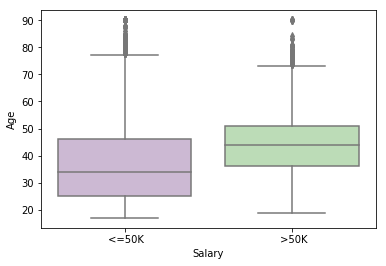

In [3]:
sns.boxplot(y="Age", x="Salary", data=df, palette="PRGn")


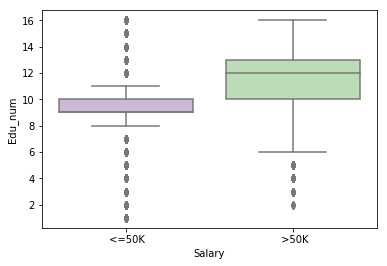

In [6]:
sns.boxplot(y="Edu_num", x="Salary", data=df, palette="PRGn")

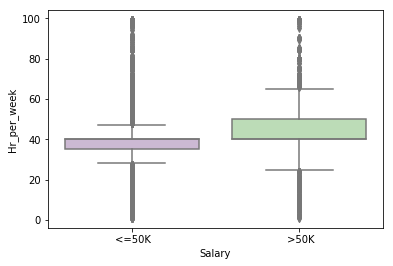

In [7]:
sns.boxplot(y="Hr_per_week", x="Salary", data=df, palette="PRGn")

In [20]:
df["WorkClass"].isnull().values

array([False, False, False, ..., False, False, False], dtype=bool)

In [27]:
st.mode(df["WorkClass"])

' Private'

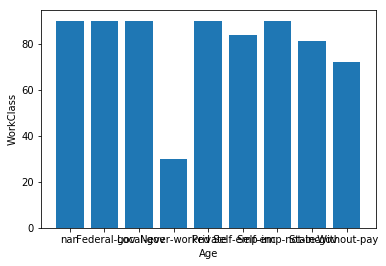

In [48]:
plt.bar(df["WorkClass"],df["Age"],label="Bar Chart")
plt.xlabel("Age")
plt.ylabel("WorkClass")
plt.show()

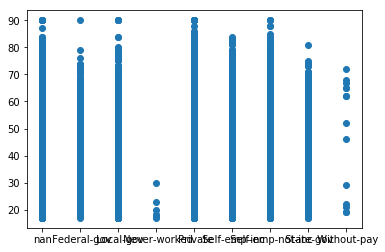

In [105]:
plt.scatter(df["WorkClass"],df["Age"])

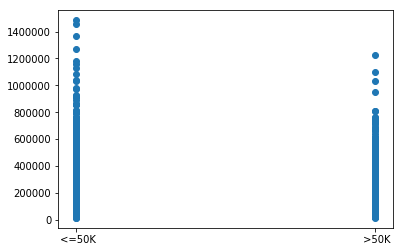

In [107]:
plt.scatter(df["Salary"],df["Final_wt"])

In [110]:
df["Education"].isnull().values.any()

False

In [112]:
df["Edu_num"].isnull().values.any()

False

In [114]:
df["Sex"].isnull().values.any()

False

In [120]:
df["Relationship"].isnull().values.any()

False

In [122]:
df["Marital_stat"].isnull().values.any()

False

In [124]:
df["Occupation"].isnull().values.any()

True

In [126]:
df["Race"].isnull().values.any()

False

In [128]:
df["cpt_gain"].isnull().values.any()

False

In [129]:
df["Native_country"].isnull().values.any()

True

In [4]:
df["Salary"].isnull().values.any()

False

In [7]:
st.mode(df["Occupation"])

' Prof-specialty'

In [12]:
df.groupby?